In [1]:
! pip install git+https://github.com/astronomy-commons/hipscat.git@main

  Cloning https://github.com/astronomy-commons/hipscat.git (to revision main) to /tmp/pip-req-build-nqyfhe99
  Running command git clone --filter=blob:none --quiet https://github.com/astronomy-commons/hipscat.git /tmp/pip-req-build-nqyfhe99
  Resolved https://github.com/astronomy-commons/hipscat.git to commit 67b4f8ece571c49370ebdc3ca5c879d34fb37460
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
! pip install lsdb

In [3]:
%env HIPSCAT_ALMANAC_DIR=/home/jovyan/efs/lincc/almanac

env: HIPSCAT_ALMANAC_DIR=/home/jovyan/efs/lincc/almanac


In [4]:
import hipscat as hc
from hipscat.inspection.almanac import Almanac
from hipscat.inspection import plot_pixels

import lsdb
from lsdb.core.search import BoxSearch, ConeSearch, PolygonSearch

In [5]:
almanac = Almanac()
almanac.catalogs()

['gaia', 'ztf_dr14']

In [6]:
gaia_hc = almanac.get_catalog("gaia")
gaia_lite = lsdb.read_hipscat(gaia_hc.catalog_base_dir, columns=["ra", "dec"], search_filter=ConeSearch(ra=-60, dec=20, radius_arcsec=1*3600))
gaia_lite.get_healpix_pixels()

[Order: 5, Pixel: 3236,
 Order: 5, Pixel: 3237,
 Order: 5, Pixel: 3238,
 Order: 5, Pixel: 3239,
 Order: 6, Pixel: 12977,
 Order: 5, Pixel: 3245]

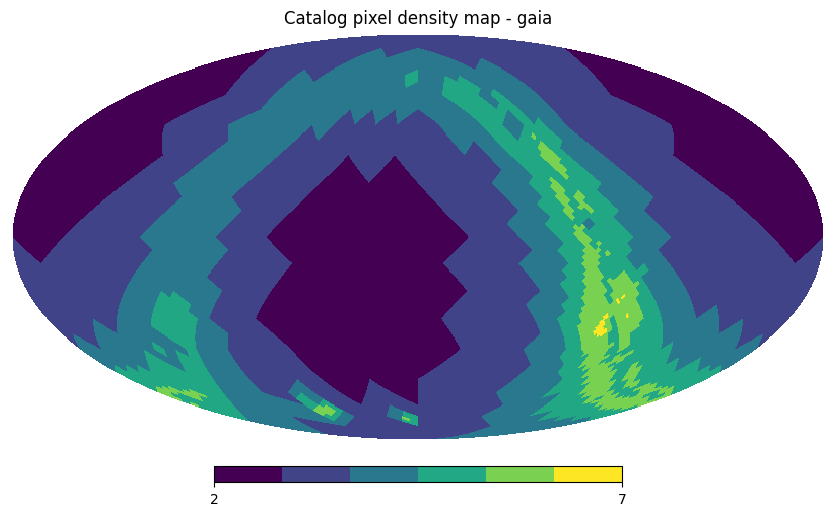

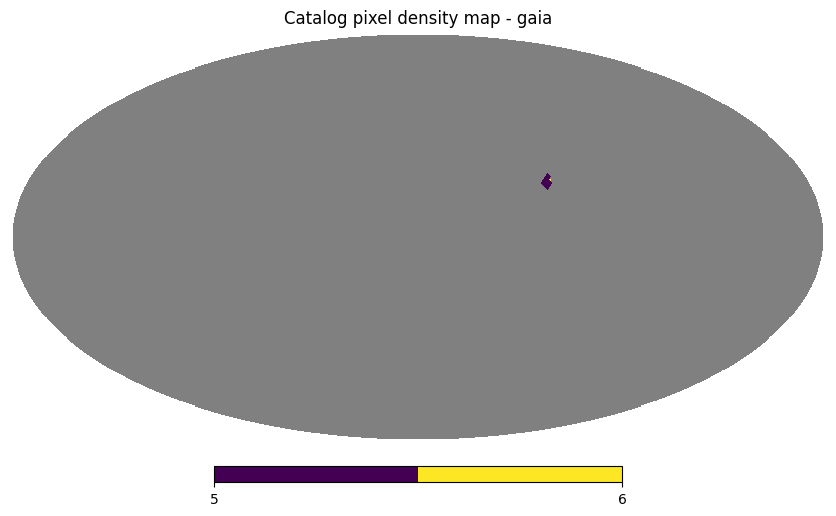

In [7]:
plot_pixels(gaia_hc)
plot_pixels(gaia_lite.hc_structure)

In [8]:
ztf_hc = almanac.get_catalog("ztf_dr14")
ztf_lite = lsdb.read_hipscat(ztf_hc.catalog_base_dir, columns=["ra", "dec"], search_filter=ConeSearch(ra=-60, dec=20, radius_arcsec=1*3600))
ztf_lite.get_healpix_pixels()

[Order: 5, Pixel: 3236,
 Order: 5, Pixel: 3237,
 Order: 5, Pixel: 3238,
 Order: 5, Pixel: 3239,
 Order: 5, Pixel: 3244,
 Order: 5, Pixel: 3245]

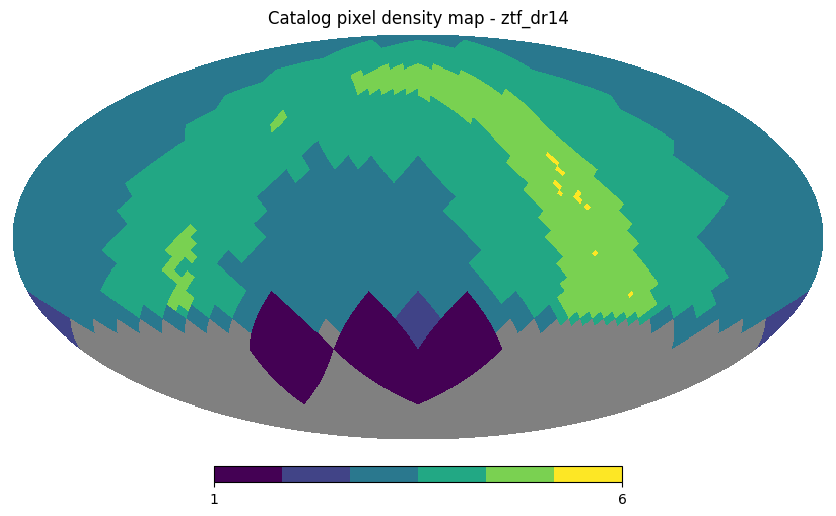

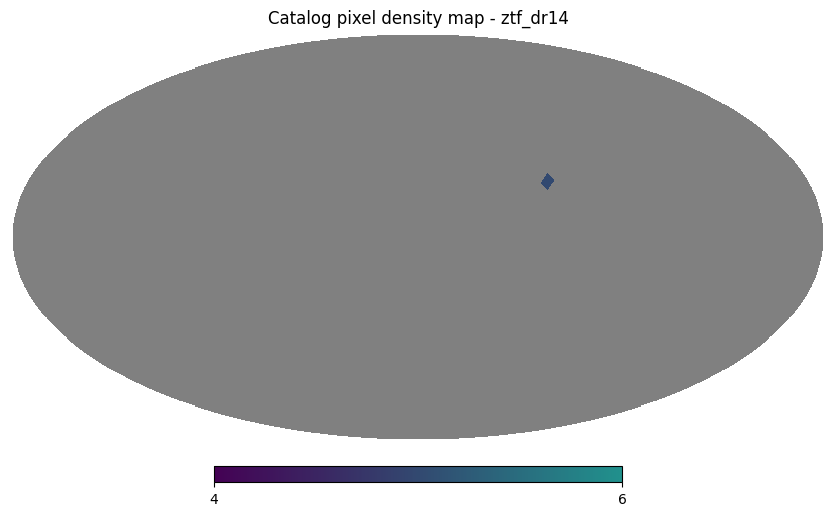

In [9]:
plot_pixels(ztf_hc)
plot_pixels(ztf_lite.hc_structure)

In [10]:
# Cross-match Gaia and ZTF
%time 
xmatch_object = gaia_lite.crossmatch(ztf_lite, require_right_margin = False)

xmatch_object.head(5)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 7.63 µs


/opt/conda/envs/science_demo/lib/python3.11/site-packages/lsdb/dask/crossmatch_catalog_data.py:117: RuntimeWarning: Right catalog does not have a margin cache. Results may be inaccurate
  warnings.warn("Right catalog does not have a margin cache. Results may be inaccurate", RuntimeWarning)


,ra_gaia,dec_gaia,ra_ztf_dr14,dec_ztf_dr14,_dist_arcsec
_hipscat_index,,,,,
3643412099679387648,300.938807,16.959530,300.938812,16.959557,0.096993
3643412100069457920,300.939196,16.960282,300.939191,16.960302,0.076818
3643412100413390848,300.938070,16.960664,300.938068,16.960826,0.584654
3643412102065946624,300.938019,16.961057,300.938068,16.960826,0.846288
3643412107736645632,300.934457,16.961220,300.934442,16.961234,0.069840
